In [164]:
import pandas as pd
import datetime

In [165]:
data = pd.read_excel('Якуценя_анализ.xlsx', sheet_name='АУ_Выгрузка')

In [170]:
year_group = data.groupby(['Год', 'Номер карты'], as_index=False).agg({'Новое посещение' : 'sum'}).rename(columns={'Новое посещение' : 'Кол-во посещений'})
year_group['Кол-во посещений'] = year_group['Кол-во посещений'].apply(lambda x: '4 и более' if x >= 4 else x)
year_group.groupby(['Год', 'Кол-во посещений'], as_index=False).agg({'Номер карты' : 'count'}).rename(columns={'Номер карты' : 'Кол-во клиентов'}).to_excel('Посещения_по_годам.xlsx')

In [168]:
year_group1 = data.groupby(['Год', 'Категория клиента', 'Номер карты'], as_index=False).agg({'Новое посещение' : 'sum'}).rename(columns={'Новое посещение' : 'Кол-во посещений'})
year_group1['Кол-во посещений'] = year_group1['Кол-во посещений'].apply(lambda x: '4 и более' if x >= 4 else x)
year_group1.groupby(['Год', 'Кол-во посещений', 'Категория клиента'], as_index=False).agg({'Номер карты' : 'count'}).rename(columns={'Номер карты' : 'Кол-во клиентов'}).to_excel('Посещения_по_годам_категориям.xlsx')

In [28]:
clients = data[data['Первое посещение'] == True] 
clients = clients.drop_duplicates(subset=['Номер карты']).reset_index(drop=True)

In [29]:
clients

,Доктор,Номер карты,Пациент,Категория клиента,Год,Дата приема,Дата первого посещения Пациента,Дата последнего посещения Пациента,Категория крупно,Наименование услуги,Sum([Всего начислено]),Новое посещение,Первое посещение
0,Якуценя Елена Николаевна,100045929,Егоров Максим Алексеевич,НАЛ,2019,2019-03-07,2019-03-07,2019-03-07,остеопатия,Остеопатия детям в амбулатории (1 сеанс),2400.0,1,True
1,Якуценя Елена Николаевна,100051544,Ремизова Екатерина Витальевна,НАЛ,2019,2019-08-15,2019-08-15,2019-08-15,остеопатия,Остеопатия взрослым в амбулатории (1 сеанс),3200.0,1,True
2,Якуценя Елена Николаевна,100073260,Раев Денис Алексеевич,НАЛ,2019,2019-06-19,2019-06-19,2019-07-31,остеопатия,Остеопатия детям в амбулатории (1 сеанс),2400.0,1,True
3,Якуценя Елена Николаевна,100074071,Чесноков Артем Феликсович,НАЛ,2019,2019-04-22,2019-04-22,2019-09-24,остеопатия,Остеопатия взрослым в амбулатории (1 сеанс),3200.0,1,True
4,Якуценя Елена Николаевна,100074274,Ратанова Виктория Сергеевна,НАЛ,2020,2020-01-30,2020-01-30,2020-03-05,остеопатия,Остеопатия детям в амбулатории (1 сеанс),2400.0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Якуценя Елена Николаевна,990381633,Москаленко Юрий Владимирович,НАЛ,2019,2019-07-18,2019-07-18,2019-08-17,остеопатия,Остеопатия взрослым в амбулатории (1 сеанс),3200.0,1,True
150,Якуценя Елена Николаевна,990417001,Лаптева Кристина Сергеевна,НАЛ,2019,2019-09-07,2019-09-07,2020-07-17,остеопатия,Остеопатия взрослым в амбулатории (1 сеанс),3200.0,1,True
151,Якуценя Елена Николаевна,990420696,Иванова Милана Данииловна,НАЛ,2019,2019-06-22,2019-06-22,2019-06-22,остеопатия,Остеопатия детям в амбулатории (1 сеанс),2400.0,1,True
152,Якуценя Елена Николаевна,990465815,Рустамова Фатма Аваз Кызы,НАЛ,2019,2019-12-11,2019-12-11,2020-01-22,остеопатия,Остеопатия взрослым в амбулатории (1 сеанс),2400.0,1,True


In [30]:
cl_group = data.groupby('Номер карты').agg({'Дата приема' : list}).rename(columns={'Дата приема' : 'Даты приемов у Якуценя'})
clients = clients.merge(cl_group, how='left', left_on='Номер карты', right_on='Номер карты')

In [32]:
clients['Остался'] = clients['Дата последнего посещения Пациента'] > clients['Дата первого посещения Пациента']

In [34]:
def yakuz(row):
    if row['Дата последнего посещения Пациента'] in row['Даты приемов у Якуценя'] and row['Остался'] == True:
        return True
    else:
        return False

clients['Остался у Якуценя'] = clients.apply(yakuz, axis=1)
    

In [36]:
clients.to_excel('Клиенты.xlsx')

In [38]:
from decimal import Decimal

from yandex_geocoder import Client

api_key = 'b996ed8b-dc1b-4dee-8687-bbb4b26dd313'


client = Client(api_key)

def coord_yandex(s):
    try:
        return ', '.join([str(i) for i in list(map(float, client.coordinates(s)))[::-1]])
    except:
        return '' 
dct = {}
    
    
coord_yandex('СПБ, Большой Сампсониевский проспект дом 45')    

'59.969601, 30.341982'

In [39]:
from geopy.distance import geodesic

# temp_lst = []
# for row in coords['Координаты']:
#     if geodesic(row.replace('[', '').replace(']', ''), '55.0415, 82.9346').meters < 100000:
#         temp_lst.append(row)

In [40]:
geodesic('59.969601, 30.341982', '59.969601, 30.341982').meters

0.0

In [45]:
s = '''Б.П. 20
Щерб.11
РЦ БС 45
Гарьк. 15к3
Брянцева 13
Колл. 4к1
Ст.П. 39А
Маршака 4
Гаврил.11
Б.П. 20
Сик. 7к2
Мор. 3к2
Б.С. 45
Колом. 28
Коменд 51к1
'''.splitlines()
d = ['Большая Пушкарская ул., д. 20',
     'улица Щербакова, д.11',
     'Б. Сампсониевский пр., д. 45, лит А',
     'ул. Погр. Гарькавого, д. 15, к.3',
     'Брянцева 13, к.1',
     'ул. Коллонтай, д. 4',
     'Старо-Петергофский пр., д.39а',
     'Пр. Маршака, 4',
     'Ул. В.Гаврилина, 11к.1',
     'Большая Пушкарская ул., д. 20',
     'ул. Сикейроса, д. 7, корпус 2',
     'Моравский переулок, д.3, к.2',
     'Б. Сампсониевский пр., д. 45, лит А',
     'Коломяжский проспект, д. 28, лит А',
     'пр. Комендантский дом 51 корпус 1'
    
]

d = ['СПБ, ' + i for i in d]

dct = dict(zip(s, d))

dct

dct2 = {}

for i in dct:
    dct2.setdefault(i, coord_yandex(dct[i]))

In [46]:
dct2

{'Б.П. 20': '59.957827, 30.300848',
 'Щерб.11': '60.028631, 30.296581',
 'РЦ БС 45': '59.969601, 30.341982',
 'Гарьк. 15к3': '59.840166, 30.145278',
 'Брянцева 13': '60.039768, 30.407505',
 'Колл. 4к1': '59.914773, 30.447139',
 'Ст.П. 39А': '59.902971, 30.275794',
 'Маршака 4': '60.035432, 30.446277',
 'Гаврил.11': '60.078666, 30.33714',
 'Сик. 7к2': '60.033481, 30.327735',
 'Мор. 3к2': '59.836454, 30.4208',
 'Б.С. 45': '59.969601, 30.341982',
 'Колом. 28': '60.009053, 30.295458',
 'Коменд 51к1': '60.031, 30.238577'}

In [47]:
adresses = pd.read_excel('Адреса.xlsx')

In [59]:
adresses = adresses[adresses['Ф_Улица'] != ' ']

In [61]:
def addr(row):
    street = row['Ф_Улица']
    if 'обл.Ленинградская' not in street:
        street = 'СПБ, ' + street
    house = row['Ф_Дом']
    
    return f'{street}, дом {house}'

In [62]:
adresses['Адрес'] = adresses.apply(addr, axis=1)

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
adresses['Координаты МЦ'] = adresses['Филиал'].apply(lambda x: dct2[x])

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
temp_coords = []
for i in adresses['Адрес']:
    temp_coords.append(coord_yandex(i))

In [71]:
adresses['Координаты адреса клиента'] = temp_coords

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ValueError: Failed to create Point instance from string: unknown format.

In [88]:
adresses

,Доктор,Номер карты,Пациент,Категория клиента,Год,Дата приема,Дата первого посещения Пациента,Дата последнего посещения Пациента,Категория крупно,Наименование услуги,...,Sum([Количество]),Филиал,Специализация АУ_ОСН,Ф_Полный адрес,Ф_Улица,Ф_Дом,Ф_Корпус,Адрес,Координаты МЦ,Координаты адреса клиента
0,Буевич Максим Вадимович,460,Салаева Валерия Александровна,НАЛ,2019,2019-08-27,2011-04-23,2020-07-27,остеопатия,Остеопатия детям в амбулатории (1 сеанс),...,1,Б.П. 20,Невролог МВ,г. Санкт-Петербург пр-кт. Невский,пр-кт Невский,27,-,"СПБ, пр-кт Невский, дом 27","59.957827, 30.300848","59.93502, 30.327052"
1,Якуценя Елена Николаевна,3368,Белова Елена Ивановна,НАЛ,2020,2020-06-03,2018-12-05,2020-06-17,остеопатия,Остеопатия взрослым в амбулатории (1 сеанс),...,1,Щерб.11,Восстановительная медицина,"г.Санкт-Петербург, пр-кт.Институтский",пр-кт Институтский,4,2,"СПБ, пр-кт Институтский, дом 4","60.028631, 30.296581","59.997514, 30.343698"
2,Якуценя Елена Николаевна,3368,Белова Елена Ивановна,НАЛ,2020,2020-06-17,2018-12-05,2020-06-17,остеопатия,Остеопатия взрослым в амбулатории (1 сеанс),...,1,Щерб.11,Восстановительная медицина,"г.Санкт-Петербург, пр-кт.Институтский",пр-кт Институтский,4,2,"СПБ, пр-кт Институтский, дом 4","60.028631, 30.296581","59.997514, 30.343698"
3,Эйвазов Сардар Магомедгади Оглы,3409,Макаров Дмитрий Сергеевич,МЦ АБ,2020,2020-03-18,2010-08-11,2020-06-15,остеопатия,Остеопатия взрослым в амбулатории (1 сеанс),...,1,РЦ БС 45,Реабилитолог,"195112 г.Санкт-Петербург, ул.Республиканская",ул Республиканская,18,1,"СПБ, ул Республиканская, дом 18","59.969601, 30.341982","59.934267, 30.412033"
4,Эйвазов Сардар Магомедгади Оглы,3409,Макаров Дмитрий Сергеевич,МЦ АБ,2020,2020-03-26,2010-08-11,2020-06-15,остеопатия,Остеопатия взрослым в амбулатории (1 сеанс),...,1,РЦ БС 45,Реабилитолог,"195112 г.Санкт-Петербург, ул.Республиканская",ул Республиканская,18,1,"СПБ, ул Республиканская, дом 18","59.969601, 30.341982","59.934267, 30.412033"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,Якуценя Елена Николаевна,990473785,Никонов Михаил Павлович,НАЛ,2019,2019-10-30,2019-10-26,2020-07-29,остеопатия,Остеопатия детям в амбулатории (1 сеанс),...,1,Щерб.11,Восстановительная медицина,NaN,ул Матроса Железняка,57,NaN,"СПБ, ул Матроса Железняка, дом 57","60.028631, 30.296581","60.000285, 30.316245"
3010,Якуценя Елена Николаевна,990473785,Никонов Михаил Павлович,НАЛ,2019,2019-11-20,2019-10-26,2020-07-29,остеопатия,Остеопатия детям в амбулатории (1 сеанс),...,1,Щерб.11,Восстановительная медицина,NaN,ул Матроса Железняка,57,NaN,"СПБ, ул Матроса Железняка, дом 57","60.028631, 30.296581","60.000285, 30.316245"
3011,Гусева Ольга Анатольевна,990474122,Бушуева Елизавета Артёмовна,СК факт,2019,2019-11-07,2019-10-26,2020-05-22,остеопатия,Остеопатия детям в амбулатории (1 сеанс),...,1,Гаврил.11,Невролог МД,NaN,ул Заречная,10,NaN,"СПБ, ул Заречная, дом 10","60.078666, 30.33714","59.776623, 30.147254"
3012,Гусева Ольга Анатольевна,990474122,Бушуева Елизавета Артёмовна,СК факт,2019,2019-11-21,2019-10-26,2020-05-22,остеопатия,Остеопатия детям в амбулатории (1 сеанс),...,1,Гаврил.11,Невролог МД,NaN,ул Заречная,10,NaN,"СПБ, ул Заречная, дом 10","60.078666, 30.33714","59.776623, 30.147254"


In [91]:
s1 = set(adresses['Адрес'].tolist())
len(s1)

1040

In [92]:
temp_dct = dict(zip(list(s1), ['' for j in range(len(s1))]))

In [96]:
import time
for key,val in temp_dct.items():
    if val == '':
        temp_dct[key] = coord_yandex(key)
        time.sleep(0.1)

In [98]:
len([i for i in temp_dct.values() if i ==''])

0

In [100]:
adresses['Координаты адреса клиента'] = adresses['Адрес'].apply(lambda x: temp_dct[x])

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
def rasst(row):
    return geodesic(row['Координаты МЦ'], row['Координаты адреса клиента']).meters

adresses['Расстояние до МЦ'] = adresses.apply(rasst, axis=1)

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [106]:
adresses['Расстояние до МЦ'].describe()

count     2983.000000
mean      7157.954381
std       6638.318988
min          0.000000
25%       2306.474438
50%       5377.366481
75%       9700.044088
max      75569.451197
Name: Расстояние до МЦ, dtype: float64

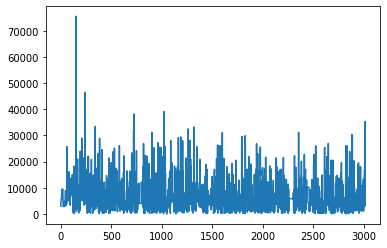

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

adresses['Расстояние до МЦ']

In [108]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

mean_confidence_interval(adresses['Расстояние до МЦ'])

(7157.954380889469, 6919.636903965512, 7396.271857813425)

In [160]:
adresses_new = adresses.drop_duplicates(subset=['Номер карты', 'Доктор'])

In [162]:
grop_adresses_new = adresses_new.groupby(['Доктор', 'Филиал'], as_index=False).agg({'Расстояние до МЦ' : 'median'})

In [163]:
grop_adresses_new

,Доктор,Филиал,Расстояние до МЦ
0,Буевич Максим Вадимович,Б.П. 20,7282.050453
1,Буевич Максим Вадимович,Б.С. 45,3187.634480
2,Буевич Максим Вадимович,Брянцева 13,3815.624049
3,Гусева Ольга Анатольевна,Гаврил.11,4988.414160
4,Гусева Ольга Анатольевна,Коменд 51к1,1878.527374
5,Гусева Ольга Анатольевна,Маршака 4,2512.838754
6,Гусева Ольга Анатольевна,Сик. 7к2,7489.389420
7,Стебунов Борис Александрович,РЦ БС 45,6841.456185
8,Эйвазов Сардар Магомедгади Оглы,РЦ БС 45,8268.438133
9,Якуценя Елена Николаевна,Гарьк. 15к3,2027.061456


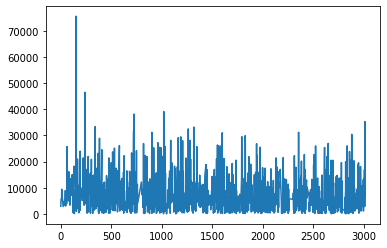

In [156]:
adresses_new['Расстояние до МЦ'].plot()

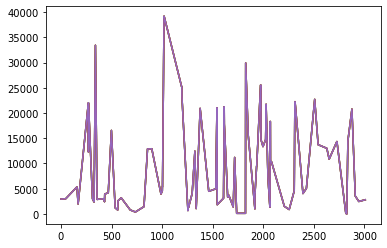

In [158]:
for doctor in set(adresses['Доктор']):
    temp = adresses[adresses['Доктор'] == 'Буевич Максим Вадимович']
    temp['Расстояние до МЦ'].plot()

In [176]:
data = data.sort_values('Дата приема')
data.drop_duplicates(['Год', 'Номер карты'], inplace=True)
data.groupby(['Год','Первое посещение'], as_index=False).agg({'Номер карты' : 'nunique'}).to_excel('Новые к старым.xlsx')

In [174]:
data.groupby(['Год']).agg({'Номер карты' : 'nunique'})

,Номер карты
Год,
2019,429
2020,201
